# Algorithm for Coffee Machine
In this page we used the libraries build in the other Jupyter pages to format and analyze the code fastly

In [1]:
#import libraries
from format_csv import *
from analyze_data import *

number of coffee in groudtruth and power= 6
number of on in groudtruth and power= 4
-------------------- ENERGY FOR ON --------------------
number of on in groudtruth and power= 4
minValue= 863.1171029999998 maxValue= 1162.154084
minAverage= 1012.6355934999999 maxAverage= 1135.9369155
Final Av= 1097.5067119583332
-------------------- ENERGY FOR COFFEE --------------------
number of coffee in groudtruth and power= 6
minValue= 0.0 maxValue= 1186.606488
minAverage= 103.92701128571426 maxAverage= 401.1178537999999
Final Av= 249.92306064761905
-------------------- ENERGY AFTER COFFEE --------------------
number of coffee in groudtruth and power= 6
minValue= 0.335134 maxValue= 936.086228
minAverage= 17.3329775 maxAverage= 357.23776359999994
Final Av= 250.42654368888884
-------------------- ENERGY AFTER ON --------------------
number of on in groudtruth and power= 4
minValue= 0.0 maxValue= 1160.235074
minAverage= 284.99707020000005 maxAverage= 691.3151504999998
Final Av= 538.4063631875
------

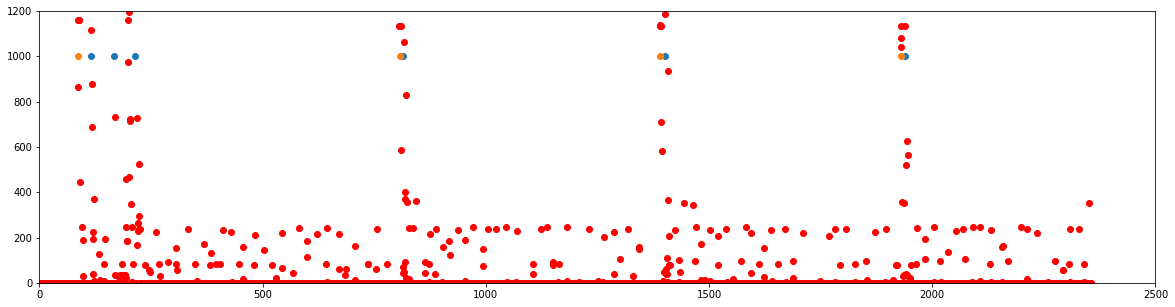

In [9]:
power = pd.read_csv("power.csv")
groundtruth = pd.read_csv("../groundtruth_correct.csv")
sp1 = get_special_point(power,groundtruth,[7,7],"coffee",1000)
sp2 = get_special_point(power,groundtruth,[7,7],"on",1000)
print("-"*20,"ENERGY FOR ON","-"*20)
average_energy(power,groundtruth,[-7,7],"on")
print("-"*20,"ENERGY FOR COFFEE","-"*20)
average_energy(power,groundtruth,[-7,7],"coffee")
print("-"*20,"ENERGY AFTER COFFEE","-"*20)
average_energy(power,groundtruth,[7,21],"coffee")
print("-"*20,"ENERGY AFTER ON","-"*20)
average_energy(power,groundtruth,[7,21],"on")
print("-"*20,"ENERGY BEFORE COFFEE","-"*20)
average_energy(power,groundtruth,[-21,-7],"coffee")
print("-"*20,"ENERGY BEFORE ON","-"*20)
average_energy(power,groundtruth,[-21,-7],"on")

draw_power_graphics(power,[sp1,sp2],band=2500)
#draw_around_event(power,groundtruth,[10,10],"coffee")

## Format the data
First we format the data imported from mongo db

In [26]:
FILE_MONGO = "..\mongo.csv"

mongo = pd.read_csv(FILE_MONGO)
mongo = remove_NaN(mongo)
groundtruth = mongo[mongo['objectId']=="nespresso_jolmilano_groundtruth"].reset_index(drop=True)

groundtruth = col_time(groundtruth)
groundtruth = col_eventNumber(groundtruth)
print(groundtruth.head(1))
groundtruth.to_csv("groudtruth.csv")

                          objectId                 time     timestamp  \
0  nespresso_jolmilano_groundtruth  2018-07-02 11:30:30  1.530524e+12   

  eventName  eventNumber  
0    coffee         1500  


Then we format the data of power and we must add 2 hours because DB in openhab use a different time zone

In [2]:
FILE_OPENHAB = "../03-07-2018.csv"
openhab = pd.read_csv(FILE_OPENHAB)#Livelli di potenza
openhab.head()

,time,value
0,2018-07-03 02:00:00.0,0.000000
1,2018-07-03 02:07:37.0,0.292534
2,2018-07-03 02:07:40.0,0.000000
3,2018-07-03 02:15:31.0,0.278355
4,2018-07-03 02:15:34.0,0.000000


In [3]:
FILE_OPENHAB = "../03-07-2018.csv"
openhab = pd.read_csv(FILE_OPENHAB)#Livelli di potenza
modify_hour(openhab,-2,2)
openhab.to_csv("power.csv")
openhab.head(3)

,time,value
0,2018-07-03 00:00:00,0.000000
1,2018-07-03 00:07:37,0.292534
2,2018-07-03 00:07:40,0.000000


## Analyze data
Now we build the graphics and calculate the average of energy for the different events

number of coffee in groudtruth and power= 0
number of on in groudtruth and power= 0


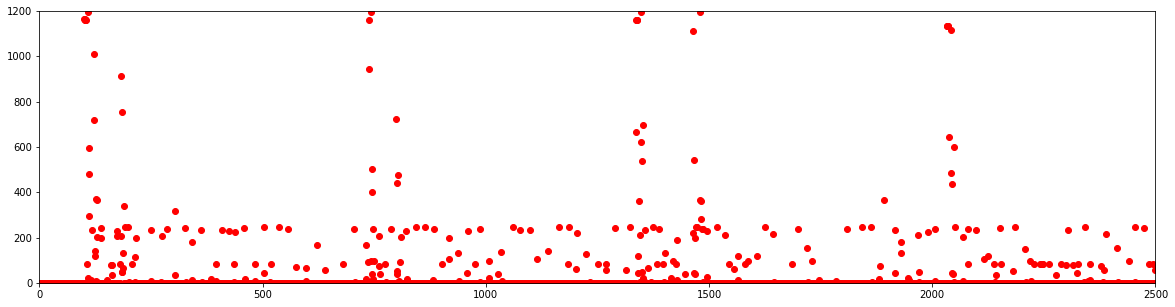

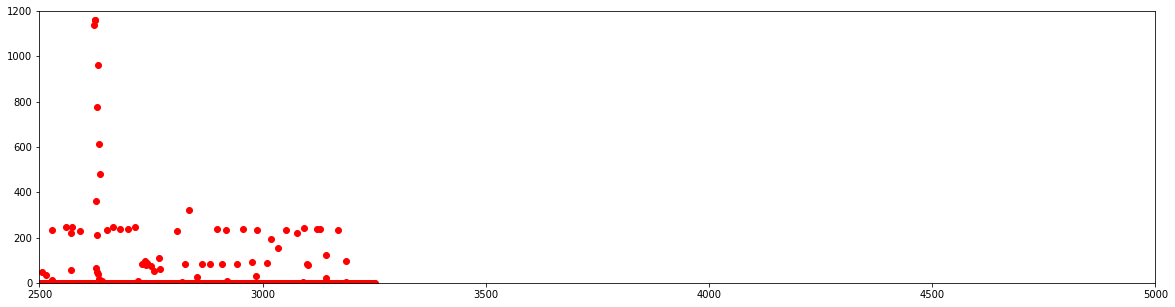

Not values found in the range
Not values found in the range
Not values found in the range


In [31]:
power = pd.read_csv("power.csv")
groundtruth = pd.read_csv("groudtruth.csv")
sp = get_special_point(power,groundtruth,[10,10],"coffee",1000)
sp_2 = get_special_point(power,groundtruth,[10,10],"on",1000)
draw_power_graphics(power,[sp,sp_2],band=2500)
#draw_around_event(power,groundtruth,[10,10],"coffee")
average_energy(power,groundtruth,[7,8],"coffee")
average_energy(power,groundtruth,[10,10],"on")
average_energy(power,groundtruth,[-10,20],"on")

In [27]:
values = power[(power['time']>'2018-07-03 09:13:00')&(power['time']<'2018-07-03 10:00:00')]['value']
s="["
for i in values:
    s += (str(i)+",")
#s[len(s)-1]="]"
s

'[863.1171029999997,1162.154084,1160.235074,1159.6837050000001,445.041178,0.300645,0.300645,0.308558,0.329397,0.397848,248.55330800000002,188.065527,29.082032,0.330782,0.0,0.307239,0.288907,0.296095,0.0,0.278685,0.0,0.313438,0.32333,0.381098,0.362699,0.28521399999999997,0.31950500000000004,0.295501,0.0,0.28007,1116.5534,689.693158,876.9397759999997,38.626501,224.051114,195.279619,368.360252,8.575994999999999,0.0,0.415522,0.687876,0.275124,0.320758,0.0,0.328342,0.32873800000000003,0.273146,0.0,125.43927,10.651427,0.0,0.319967,0.31634,0.32768200000000003,0.0,0.284752,0.28462,0.291281,82.567538,7.093610000000001,194.247178,0.0,0.3718,0.30295300000000003,0.0,0.31119600000000003,0.297084,0.309811,0.0,0.288313,0.335926,0.30295300000000003,0.37456999999999996,0.0,0.409455,0.380307,0.327419,0.327419,0.348455,0.38459299999999996,0.38459299999999996,0.28580700000000003,0.32642899999999997,733.0269040000003,34.330821,0.335134,0.31878,0.31878,0.27176100000000003,0.27176100000000003,0.0,0.0,0.33065

# File in Python

In [10]:
%%writefile algorithm_coffe_machine.py

#import libraries
from format_csv import *
from analyze_data import *

power = pd.read_csv("power.csv")
groundtruth = pd.read_csv("../groundtruth_correct.csv")
sp1 = get_special_point(power,groundtruth,[7,7],"coffee",1000)
sp2 = get_special_point(power,groundtruth,[7,7],"on",1000)
print("-"*20,"ENERGY FOR ON","-"*20)
average_energy(power,groundtruth,[-7,7],"on")
print("-"*20,"ENERGY FOR COFFEE","-"*20)
average_energy(power,groundtruth,[-7,7],"coffee")
print("-"*20,"ENERGY AFTER COFFEE","-"*20)
average_energy(power,groundtruth,[7,21],"coffee")
print("-"*20,"ENERGY AFTER ON","-"*20)
average_energy(power,groundtruth,[7,21],"on")
print("-"*20,"ENERGY BEFORE COFFEE","-"*20)
average_energy(power,groundtruth,[-21,-7],"coffee")
print("-"*20,"ENERGY BEFORE ON","-"*20)
average_energy(power,groundtruth,[-21,-7],"on")

draw_power_graphics(power,[sp1,sp2],band=2500)
#draw_around_event(power,groundtruth,[10,10],"coffee")

Overwriting algorithm_coffe_machine.py
